In [178]:
# MANE 4962 Homework-2 Q3

In [179]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Prepare the data

In [181]:
data = load_iris() #shift+tab

In [182]:
df = pd.DataFrame() # Remove one of the features
# df['sepal width'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2] 
df['petal width'] = data['data'][:,3] 
""" Work with sepal width, petal length, petal width"""

' Work with sepal width, petal length, petal width'

In [183]:
display(df)

,sepal width,petal length,petal width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


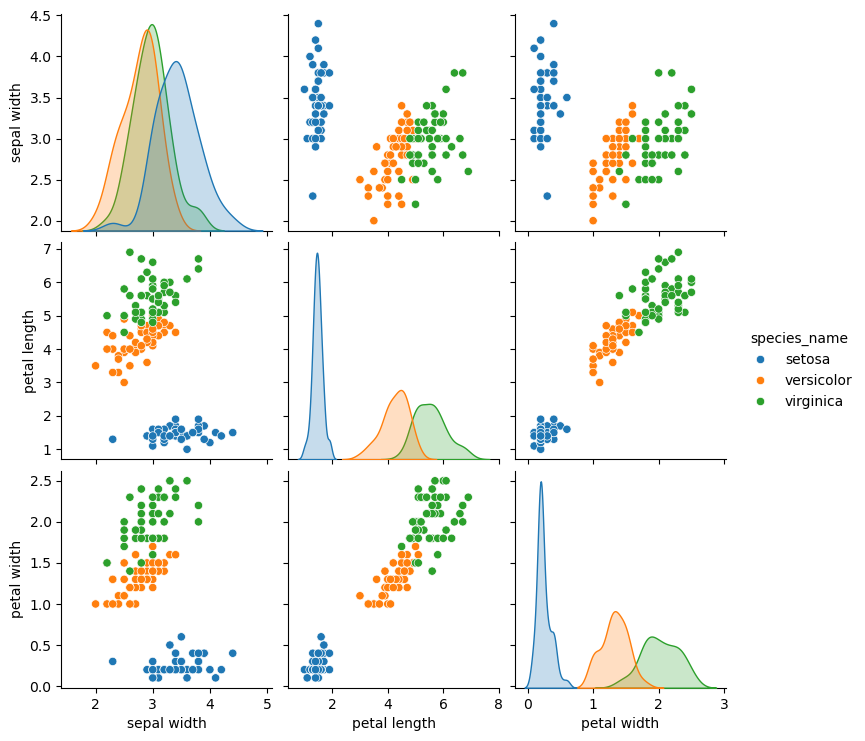

In [184]:
X = df.to_numpy() # These are our features

df['target'] = data['target']

named_targets = []

for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])
    

df['species_name'] = named_targets

# sns.pairplot(df, hue='target')
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_name')

# y will not be used because we are doing unsupervised learning

### ideally we should only split X because the data is supposed to be not labeled

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test =train_test_split(
    X,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)

X_train shape : (105, 3)
X_test shape : (45, 3)


### However, since we have labeled iris data we are going to split both X and y and just keep the y seperate. Also split indices to keep track of training and testing data 

In [189]:
y = df['target'].to_numpy()

X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (105, 3)
X_test shape : (45, 3)
y_train shape : (105,)
y_test shape : (45,)


['train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'test', 'test', 'test', 'test', 'train', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'test', 'train', 'train', 'train', 'train', 'train', 'train', 'test', 'test', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train', 'test', 'train', 'train', 'train', 'train'

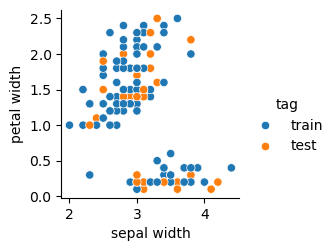

In [190]:
# tag points with train or test labels

tag = []

for _ in range(X.shape[0]):
    if _ in idx_train:
        tag.append('train')
    else:
        tag.append('test')
        
print(tag)
df['tag'] = tag

sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal width'],
    y_vars=['petal width'], hue='tag')

 since we used a good mix of points from everywhere selection bias is minimal.

## data preparation is complete (on to algorithms)

In [193]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.cluster_labels = None
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        self.cluster_labels = np.arange(self.k)        
        while True:
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
            self.clusters = np.argmin(distances, axis=0)
            new_centroids = np.array([X[self.clusters == i, :].mean(axis=0) for i in range(self.k)])
            # check convergence
            if np.array_equal(new_centroids, self.centroids):
                break
            else:
                self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return self.cluster_labels[np.argmin(distances, axis=0)]

In [194]:
model = KMeans(k=3)
model.fit(X_train)
kmeans_labels = model.predict(X) # Predict using the whole data of X
cluster_coords = model.centroids
print('predicted_labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted_labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
cluster centroids: [[3.43428571 1.48857143 0.26571429]
 [2.73030303 4.17272727 1.28181818]
 [2.94594595 5.47297297 1.98108108]]


### since we have labeled data we may be tempted to compare them our data but it will not make sense. Because the integer labels of kmeans are not the same as the class labels given to the iris data.

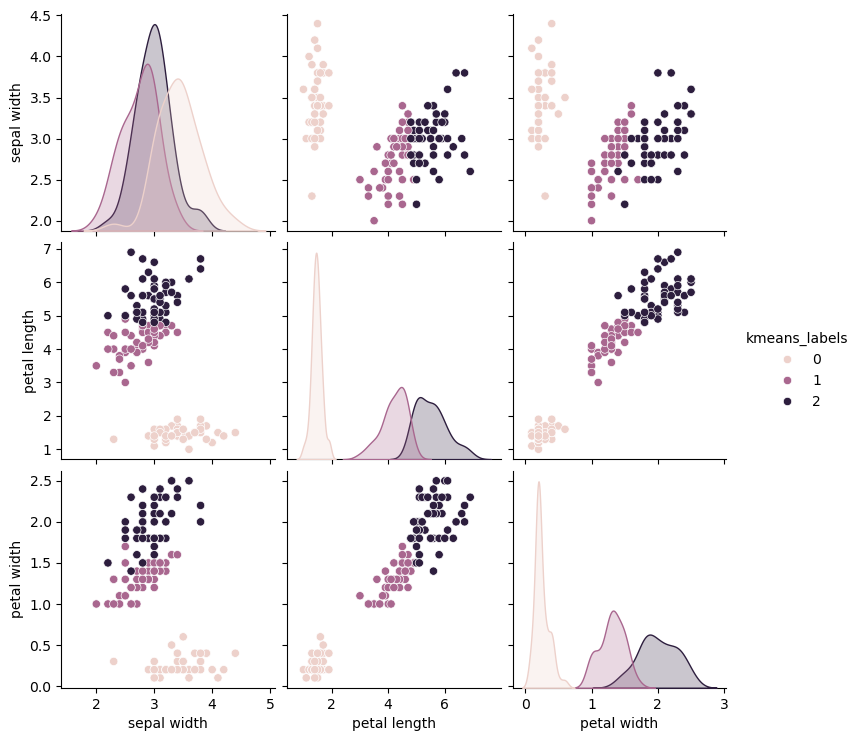

In [196]:
y_train

df['kmeans_labels'] = model.predict(X)

sns.pairplot(df.drop(labels=['target'],axis=1), hue='kmeans_labels')

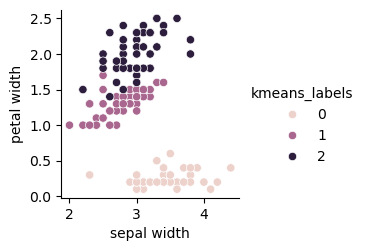

In [197]:
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal width'],
    y_vars=['petal width'], hue='kmeans_labels')

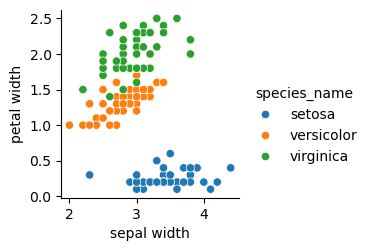

In [198]:
sns.pairplot(df.drop(labels=['target'],axis=1), x_vars=['sepal width'],
    y_vars=['petal width'], hue='species_name')

In [199]:
df.columns

Index(['sepal width', 'petal length', 'petal width', 'target', 'species_name',
       'tag', 'kmeans_labels'],
      dtype='object')

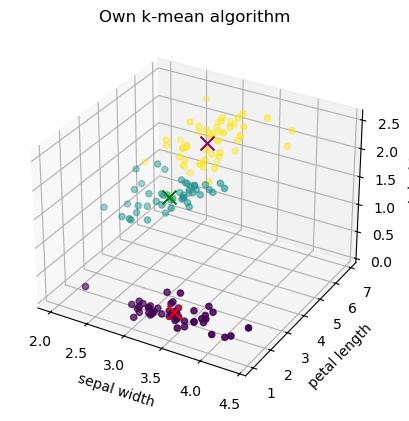

In [200]:
# 3D Plot of k-Means Algorithm
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d', computed_zorder=False)
ax1.scatter(df['sepal width'].to_list(), df['petal length'].to_list(),df['petal width'].to_list(), c = kmeans_labels, zorder = 2)
ax1.scatter(cluster_coords[0][0], cluster_coords[0][1], cluster_coords[0][2], color='red', marker='x', s=100, zorder = 3)
ax1.scatter(cluster_coords[1][0], cluster_coords[1][1], cluster_coords[1][2], color='green', marker='x', s=100, zorder = 3)
ax1.scatter(cluster_coords[2][0], cluster_coords[2][1], cluster_coords[2][2], color='purple', marker='x', s=100, zorder = 3)
ax1.set_xlabel('sepal width')
ax1.set_ylabel('petal length')
ax1.set_zlabel('petal width')
ax1.set_title('Own k-mean algorithm')
plt.show()

### skLearn KMeans Plot

C:\Users\calvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


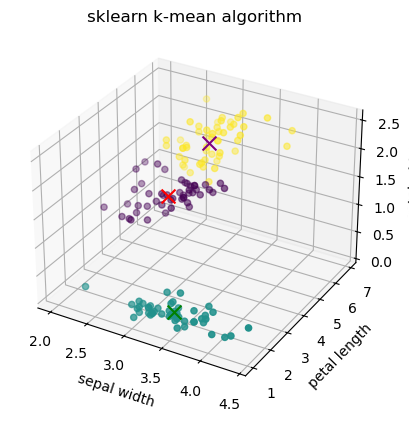

In [202]:
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)
skmodel.labels_ # training labels
skmodel.predict(X_test) # predict labels, remember the integers do not make same sense in training and testing for clustering
skmodel_labels = skmodel.predict(X)
skmodel_cluster = skmodel.cluster_centers_

df['skmodel_labels'] = skmodel_labels

# 3D Plot of k-Means Algorithm from sklearn
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d', computed_zorder=False)
ax1.scatter(df['sepal width'].to_list(), df['petal length'].to_list(),df['petal width'].to_list(), c = skmodel_labels, zorder = 2)
ax1.scatter(skmodel_cluster[0][0], skmodel_cluster[0][1], skmodel_cluster[0][2], color='red', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster[1][0], skmodel_cluster[1][1], skmodel_cluster[1][2], color='green', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster[2][0], skmodel_cluster[2][1], skmodel_cluster[2][2], color='purple', marker='x', s=100, zorder = 3)
ax1.set_xlabel('sepal width')
ax1.set_ylabel('petal length')
ax1.set_zlabel('petal width')
ax1.set_title('sklearn k-mean algorithm')
plt.show()

In [203]:
# Highlight Differences in the cluster centroid
print(cluster_coords)
print(skmodel_cluster)

[[3.43428571 1.48857143 0.26571429]
 [2.73030303 4.17272727 1.28181818]
 [2.94594595 5.47297297 1.98108108]]
[[2.71470588 4.19705882 1.28823529]
 [3.43428571 1.48857143 0.26571429]
 [2.96666667 5.48611111 1.99444444]]


C:\Users\calvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


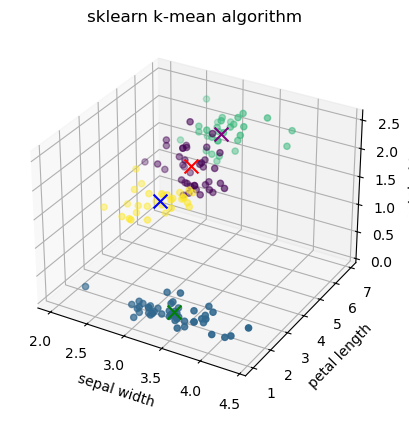

In [204]:
# Varying the number of Clusters (Test out 4): 
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)
skmodel.labels_ # training labels
skmodel.predict(X_test) # predict labels, remember the integers do not make same sense in training and testing for clustering
skmodel_labels = skmodel.predict(X)
skmodel_cluster1 = skmodel.cluster_centers_

df['skmodel_labels'] = skmodel_labels

# 3D Plot of k-Means Algorithm from sklearn
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d', computed_zorder=False)
ax1.scatter(df['sepal width'].to_list(), df['petal length'].to_list(),df['petal width'].to_list(), c = skmodel_labels, zorder = 2)
ax1.scatter(skmodel_cluster1[0][0], skmodel_cluster1[0][1], skmodel_cluster1[0][2], color='red', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster1[1][0], skmodel_cluster1[1][1], skmodel_cluster1[1][2], color='green', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster1[2][0], skmodel_cluster1[2][1], skmodel_cluster1[2][2], color='purple', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster1[3][0], skmodel_cluster1[3][1], skmodel_cluster1[3][2], color='blue', marker='x', s=100, zorder = 3)
ax1.set_xlabel('sepal width')
ax1.set_ylabel('petal length')
ax1.set_zlabel('petal width')
ax1.set_title('sklearn k-mean algorithm')
plt.show()

C:\Users\calvi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


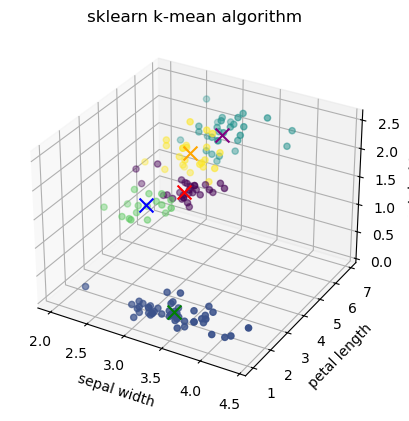

In [205]:
# Test out 5
from sklearn.cluster import KMeans
skmodel = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init='auto',
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd',
)

skmodel.fit(X_train)
skmodel.labels_ # training labels
skmodel.predict(X_test) # predict labels, remember the integers do not make same sense in training and testing for clustering
skmodel_labels = skmodel.predict(X)
skmodel_cluster2 = skmodel.cluster_centers_

df['skmodel_labels'] = skmodel_labels

# 3D Plot of k-Means Algorithm from sklearn
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d', computed_zorder=False)
ax1.scatter(df['sepal width'].to_list(), df['petal length'].to_list(),df['petal width'].to_list(), c = skmodel_labels, zorder = 2)
ax1.scatter(skmodel_cluster2[0][0], skmodel_cluster2[0][1], skmodel_cluster2[0][2], color='red', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster2[1][0], skmodel_cluster2[1][1], skmodel_cluster2[1][2], color='green', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster2[2][0], skmodel_cluster2[2][1], skmodel_cluster2[2][2], color='purple', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster2[3][0], skmodel_cluster2[3][1], skmodel_cluster2[3][2], color='blue', marker='x', s=100, zorder = 3)
ax1.scatter(skmodel_cluster2[4][0], skmodel_cluster2[4][1], skmodel_cluster2[4][2], color='orange', marker='x', s=100, zorder = 3)
ax1.set_xlabel('sepal width')
ax1.set_ylabel('petal length')
ax1.set_zlabel('petal width')
ax1.set_title('sklearn k-mean algorithm')
plt.show()